# **Clustering Techniques**

Let's import iris data from sklearn for implementing clustering algorithms . The Iris dataset is a well-known dataset in machine learning that consists of 150 samples from three different species of Iris flowers: setosa, versicolor, and virginica. The dataset contains four features for each sample: sepal length, sepal width, petal length, and petal width.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


There is no null values.

### Data Preprocessing

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.skew()

,0
sepal length (cm),0.314911
sepal width (cm),0.318966
petal length (cm),-0.274884
petal width (cm),-0.102967


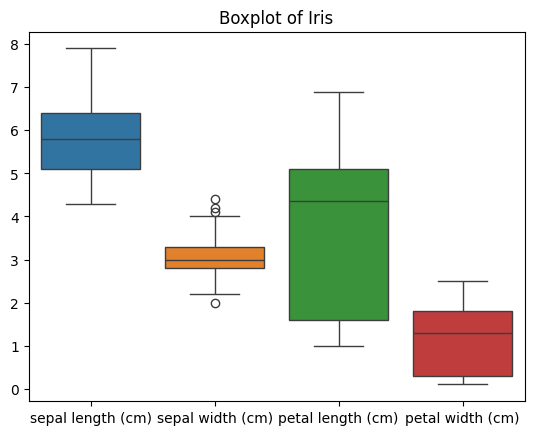

In [5]:
sns.boxplot(df)
plt.title("Boxplot of Iris")
plt.show()

There are some outliers in sepal width . They can be capped with lower bound and upper bound values.

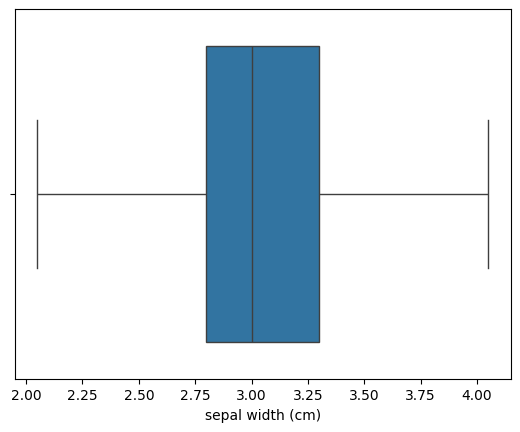

In [6]:
q1 = df["sepal width (cm)"].quantile(0.25)
q3 = df["sepal width (cm)"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Apply the IQR rule to cap the outliers
df["sepal width (cm)"] = np.where(df["sepal width (cm)"] < lower_bound, lower_bound, df["sepal width (cm)"])
df["sepal width (cm)"] = np.where(df["sepal width (cm)"] > upper_bound, upper_bound, df["sepal width (cm)"])
sns.boxplot(data=df,x="sepal width (cm)")
plt.show()

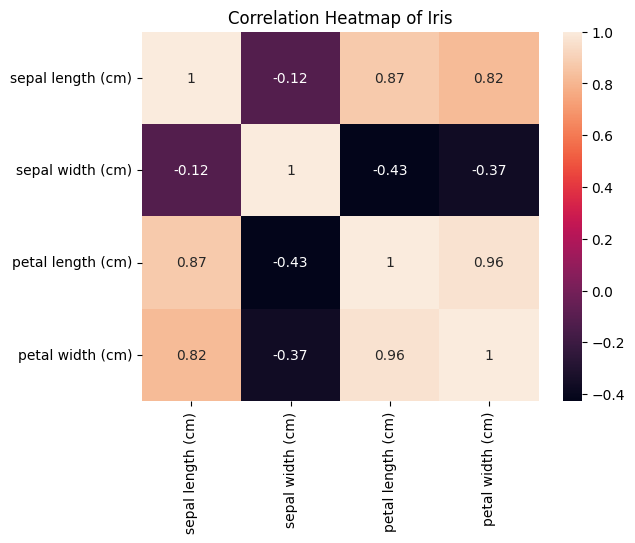

In [7]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Heatmap of Iris")
plt.show()

Sepal length is highly correlated with petal length and petal width.Similarly petal width is highly correlated with sepal length and petal length.

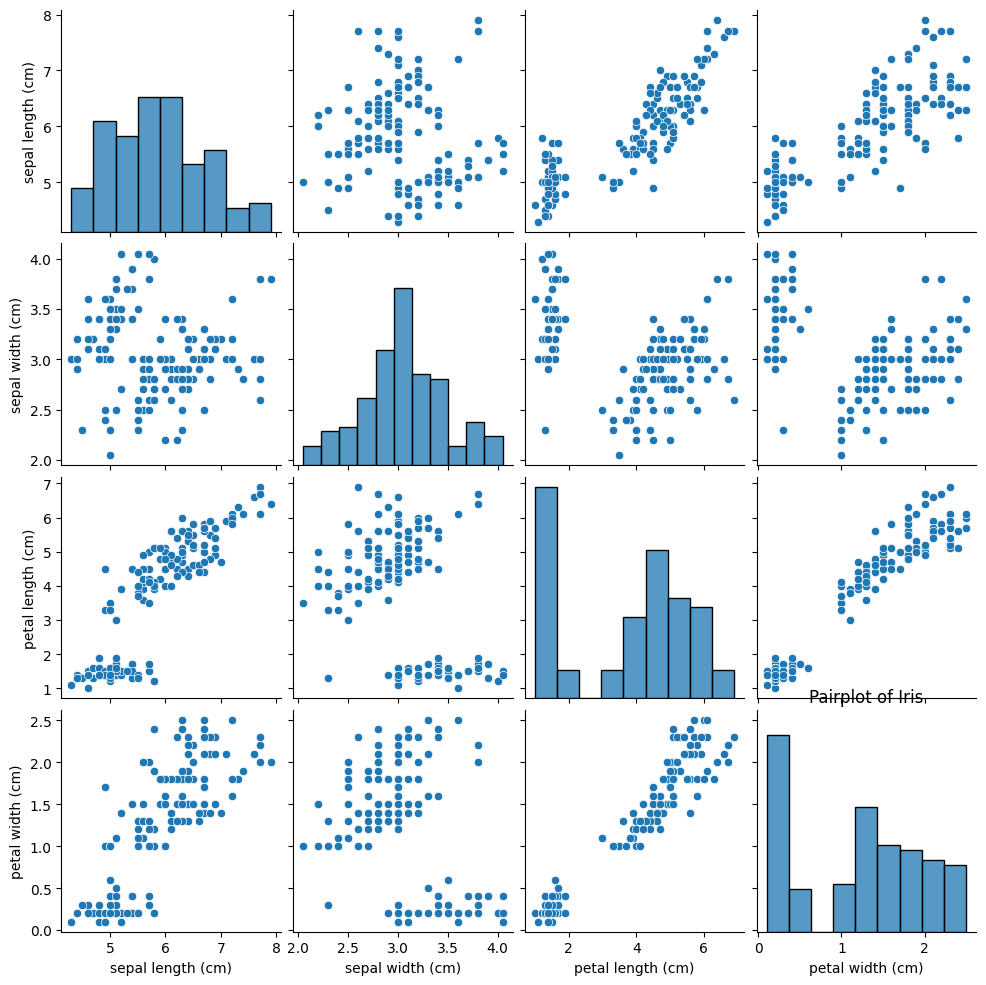

In [8]:
sns.pairplot(df)
plt.title("Pairplot of Iris")
plt.show()

### Standarizing Features

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)



## **Clustering Algorithm Implementation**

##  K Means Clustering

KMeans is a  unsupervised machine learning algorithm used for clustering. It groups data points into a predefined number of clusters (K) based on their feature similarity.

#### How it Works    

* At first choose the number of clusters (K) that is to be created based on elbow method.
  

* Then randomly initialize K centroids, which represents the center of each cluster.

* Each data point is assigned to the nearest centroid based on their distance.   


* The centroids are recalculated by taking the mean of all points in the cluster.This new centroid becomes the center of the cluster.

* Assigning and updating are repeated until the centroids no longer change.







#### Reason for choosing K Means

KMeans clustering is well-suited for the Iris dataset because the data is continuous, has distinct natural groupings (species), and has a manageable size. By applying KMeans, you can effectively cluster the samples into species-like groups, and evaluate the results by comparing the clusters to the actual species labels.

### Applying Elbow Method to Find Optimal Number of Clusters

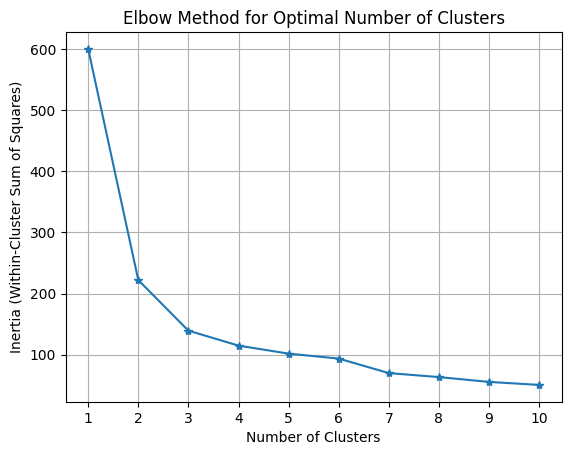

In [10]:
from sklearn.cluster import KMeans
# Apply the Elbow Method to determine the optimal number of clusters
wcss = [] #y axis
k_values = range(1, 11)
# Check from 1 to 10 clusters,x axis

for i in k_values:# i=1
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled) # Use scaled data
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss,marker="*")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(np.arange( 1,11))
plt.grid(True)
plt.show()

Here the elbow is formed at K =3 . From the point 3, inertia is decreasing at a slow rate.

### Fitting K Means

In [11]:

kmeans = KMeans(n_clusters=3,init='k-means++',n_init=20) # with 3 clusters
df['Cluster'] = kmeans.fit_predict(df_scaled)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [12]:
cluster_profile = df.groupby('Cluster').mean()
cluster_profile

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Cluster,,,,
0,6.780851,3.095745,5.510638,1.972340
1,5.006000,3.417000,1.462000,0.246000
2,5.801887,2.674528,4.369811,1.413208


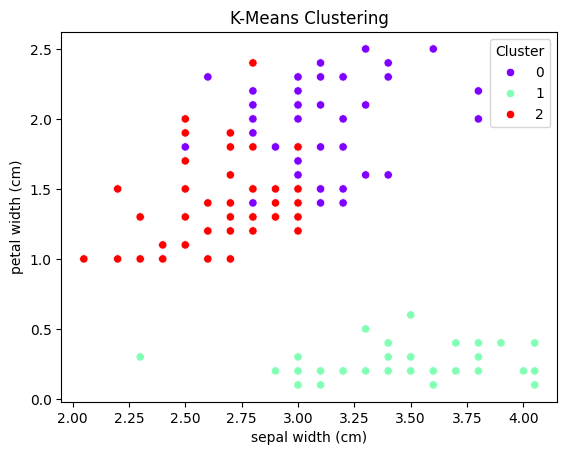

In [13]:
sns.scatterplot(x=df['sepal width (cm)'], y=df['petal width (cm)'], hue=df['Cluster'],palette="rainbow")
plt.title('K-Means Clustering')
plt.show()

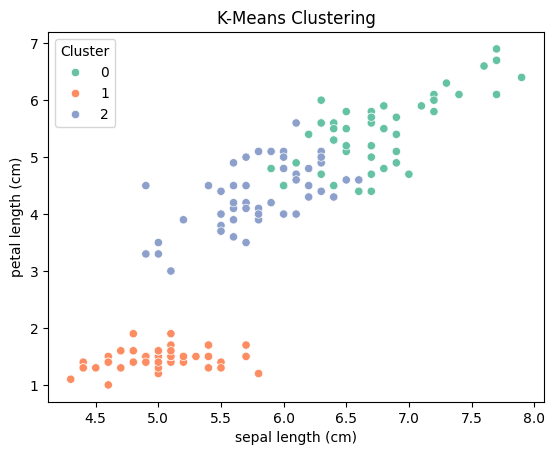

In [14]:
sns.scatterplot(x=df['sepal length (cm)'], y=df['petal length (cm)'], hue=df['Cluster'],palette="Set2")
plt.title('K-Means Clustering')
plt.show()

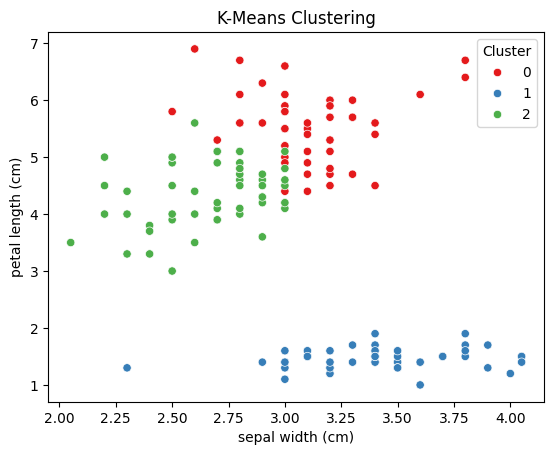

In [15]:
sns.scatterplot(x=df['sepal width (cm)'], y=df['petal length (cm)'], hue=df['Cluster'],palette="Set1")
plt.title('K-Means Clustering')
plt.show()

### Silhouette Score

In [16]:
from sklearn.metrics import silhouette_score
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_scaled, labels)

print(silhouette_avg)

0.4619819674932745


Low Silhoutte score indicates that the clusters are not well separted , some points are closer to a different cluster than their own.

## Hierarchial Clustering

Hierarchical Clustering is an unsupervised machine learning algorithm that builds a tree-like structure called a dendrogram to represent the hierarchy of clusters. Unlike KMeans, hierarchical clustering doesn’t require the user to specify the number of clusters beforehand. Instead, it creates a tree of nested clusters that can be cut at any level to form the desired number of clusters.



Agglomerative Hierarchical Clustering is the most commonly used method. It starts by treating each data point as its own cluster. It then iteratively merges the two closest clusters based on a distance metric until all points are in a single cluster.



Hierarchical clustering is a suitable choice for the Iris dataset because:

* It doesn't require a predefined number of clusters.

* It provides a visual and interpretable representation of the clustering process through the dendrogram.

* It is effective for small datasets with natural groupings like the Iris dataset.

* It works well for capturing the similarity and relationships between species based on feature values.



### Dendrogram Without labels shows three definite clusters.



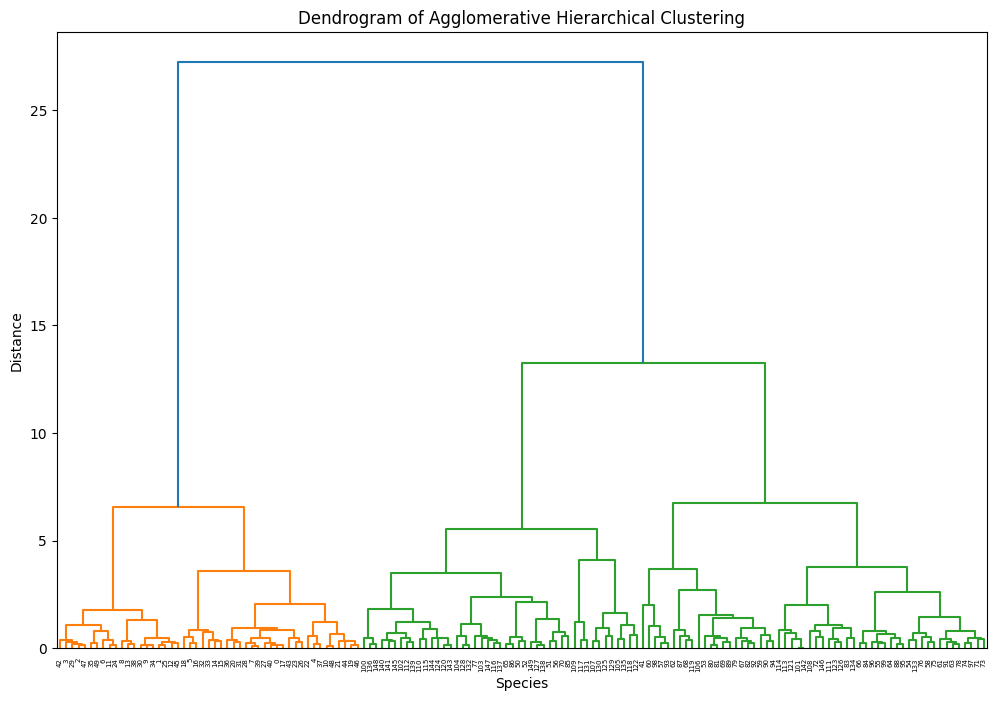

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(df_scaled, method='ward')
labels=iris.target_names[iris.target]

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, leaf_rotation=90)
plt.title('Dendrogram of Agglomerative Hierarchical Clustering')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.show()

### Dendrogram with Labels specified

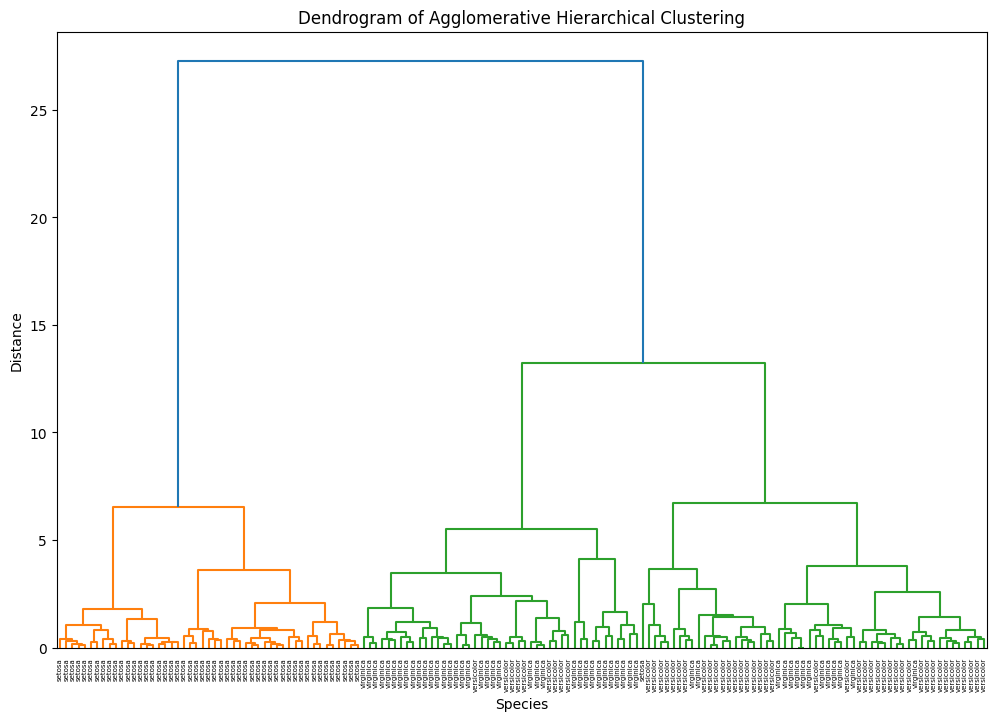

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(df_scaled, method='ward')
labels=iris.target_names[iris.target]

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=labels, leaf_rotation=90)
plt.title('Dendrogram of Agglomerative Hierarchical Clustering')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.show()


The dendrogram shows that setosa forms a distinct cluster, while versicolor and virginica merge into a single cluster due to their similarities. This indicates that setosa is clearly separate from the other two species. Cutting the dendrogram at the right height reveals three clusters, corresponding to the three Iris species.